<a href="https://colab.research.google.com/github/head1ton/ML_Analysis/blob/master/The_Gap_Between_Rich_and_Poor_in_the_AI_Revolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium
from IPython.display import IFrame
from IPython.core.display import Image, display
import warnings
warnings.filterwarnings('ignore')

In [85]:
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./income_group_map.html
./test.png
./.config/active_config
./.config/.last_update_check.json
./.config/gce
./.config/.last_survey_prompt.yaml
./.config/config_sentinel
./.config/.metricsUUID
./.config/logs/2020.01.30/17.25.30.131140.log
./.config/logs/2020.01.30/17.24.58.944263.log
./.config/logs/2020.01.30/17.25.12.057369.log
./.config/logs/2020.01.30/17.24.41.504215.log
./.config/logs/2020.01.30/17.25.30.614837.log
./.config/logs/2020.01.30/17.25.16.036944.log
./.config/configurations/config_default
./2018/freeFormResponses.csv
./2018/SurveySchema.csv
./2018/multipleChoiceResponses.csv
./2019/questions_only.csv
./2019/other_text_responses.csv
./2019/multiple_choice_responses.csv
./2019/survey_schema.csv
./worldbank/world-countries.json
./worldbank/worldbank_classification.csv
./2017/multipleChoiceResponses.csv
./2017/conversionRates.csv
./2017/RespondentTypeREADME.txt
./2017/freeformResponses.csv
./2017/schema.csv
./sample_data/anscombe.json
./sample_data/README.md
./sample_data/cali

In [0]:
RESPONSES_19 = './2019/multiple_choice_responses.csv'
RESPONSES_18 = './2018/multipleChoiceResponses.csv'
RESPONSES_17 = './2017/multipleChoiceResponses.csv'
WORLDBANK_CLASS = './worldbank/worldbank_classification.csv'
WORLD_COUNTRIES_JSON = './worldbank/world-countries.json'

In [0]:
# Colours and formatting
DEFAULT_COLOUR = '#0075c4' 
HIGH_COLOUR = '#2c63c9'
UP_MID_COLOUR = '#7d2e68'
LOW_MID_COLOUR = '#d72638'
ALPHA=0.85
# sns.set_style("whitegrid")
sns.set(style="whitegrid", context="notebook", palette="deep")

INCOME_GROUP_ORDER = ['Lower mid', 'Upper mid', 'High']

encoding_dict = {}
encoding_dict['Q1'] = { # Age
    '18-21' : 0, '22-24' : 1, '25-29' : 2, '30-34' : 3, '35-39' : 4, 
    '40-44' : 5, '45-49' : 6, '50-54' : 7, '55-59' : 8, '60-69' : 9, 
    '70+' : 10,
}

encoding_dict['Q4'] = { # Education
    'I prefer not to answer': 0, 
    'Highschool or lower' : 1,
    'Some university': 2, 
    'Bachelor’s degree' : 3,
    'Master’s degree' : 4, 
    'Doctoral degree' : 5,
    'Professional degree' : 6, 
}

encoding_dict['Q6'] = { # Company size
    '0-49 employees': 0, 
    '50-249 employees' : 1, 
    '250-999 employees': 2, 
    '1000-9,999 employees' : 3,
    '> 10,000 employees' : 4,
}

encoding_dict['Q7'] = { # Number of individuals responsible for data science
    '0' : 0,
    '1-2': 1,
    '3-4': 2,
    '5-9': 3,
    '10-14': 4,
    '15-19': 5,
    '20+': 6
}

encoding_dict['Q8'] = { # Use of ML methods
    "Don't know": 0,
    'None': 1,
    'Exploring': 2,
    'Insights only': 3,
    'Productive < 2 years': 4, 
    'Productive > 2 years': 5

}

encoding_dict['Q11'] = { # Spending on ML/Cloud products
    '$0 (USD)': 0,
    '$1-$99': 1,
    '$100-$999': 2,
    '$1000-$9,999': 3,
    '$10,000-$99,999': 4,
    '> $100,000 ($USD)': 5
}

encoding_dict['Q10'] =  { # Salary
    '$0-999' : 0, '1,000-1,999' : 1, '2,000-2,999' : 2, '3,000-3,999' : 3, '4,000-4,999' : 4,
    '5,000-7,499' : 5, '7,500-9,999' : 6, '10,000-14,999' : 7, '15,000-19,999' : 8, '20,000-24,999' : 9,
    '25,000-29,999' : 10, '30,000-39,999' : 11, '40,000-49,999' : 12, '50,000-59,999' : 13, '60,000-69,999' : 14,
    '70,000-79,999' : 15, '80,000-89,999' : 16, '90,000-99,999' : 17, '100,000-124,999' : 18, '125,000-149,999' : 19,
    '150,000-199,999' : 20,    '200,000-249,999' : 21, '250,000-299,999' : 22, '300,000-500,000' : 23, '> $500,000' : 24,
}

encoding_dict['Q15'] =  { # Coding experience
    'None' : 0, '< 1 years' : 1, '1-2 years' : 2, '3-5 years' : 3, '5-10 years' : 4,
    '10-20 years' : 5, '20+ years' : 6,
}

encoding_dict['Q22'] =  { # TPU use
    'Never': 0, 
    'Once': 1,
    '2-5 times': 2, 
    '6-24 times': 3,
    '> 25 times': 4
}

encoding_dict['Q23'] =  { # ML experience
    '< 1 years' : 0, '1-2 years' : 1, '2-3 years' : 2, '3-4 years' : 3, '4-5 years' : 4, 
    '5-10 years' : 5, '10-15 years' : 6, '15-20 years' : 7, '20+ years' : 8,
}

# nominal encodings
encoding_dict['Q2'] = { # gender
    'Male': 'male',
    'Female': 'female',
    'Prefer not to say': 'prefer not to say',
    'Prefer to self-describe': 'self-describe',
}

encoding_dict['Q5'] = { # title
    'Not employed': 'Not employed', 
    'Student': 'Student',
    'Product/Project Manager': 'Product/Project Manager',
    'Business Analyst': 'Business Analyst',
    'Data Analyst': 'Data Analyst', 
    'Data Engineer': 'Data Engineer', 
    'DBA/Database Engineer': 'DBA/Database Engineer', 
    'Software Engineer': 'Software Engineer', 
    'Statistician': 'Statistician',
    'Data Scientist': 'Data Scientist', 
    'Research Scientist': 'Research Scientist', 
    'Other': 'Other', 
}

encoding_dict['Q9'] =  { # work activities 
    'Q9_Part_7': 'None',
    'Q9_Part_1': 'Data analysis',
    'Q9_Part_2': 'Data Infrastructure',
    'Q9_Part_3': 'Build ML Prototypes',
    'Q9_Part_4': 'Build/Run ML Services',
    'Q9_Part_5': 'Experimentation ML Models',
    'Q9_Part_6': 'ML Research',
    'Q9_Part_8': 'Other',
}

encoding_dict['Q12'] =  { # media 
    'Q12_Part_11': 'None',
    'Q12_Part_1': 'Twitter',
    'Q12_Part_2': 'Hacker News',
    'Q12_Part_3': 'Reddit',
    'Q12_Part_4': 'Kaggle',
    'Q12_Part_5': 'course forums',
    'Q12_Part_6': 'YouTube',
    'Q12_Part_7': 'podcasts',
    'Q12_Part_8': 'blogs',
    'Q12_Part_9': 'journals',
    'Q12_Part_10': 'Slack',
    'Q12_Part_12': 'Other',
}

encoding_dict['Q13'] =  { # DS course platforms 
    'Q13_Part_11': 'None',
    'Q13_Part_1': 'Udacity',
    'Q13_Part_2': 'Coursera',
    'Q13_Part_3': 'edX',
    'Q13_Part_4': 'DataCamp',
    'Q13_Part_5': 'DataQuest',
    'Q13_Part_6': 'Kaggle Courses',
    'Q13_Part_7': 'Fast.ai',
    'Q13_Part_8': 'Udemy',
    'Q13_Part_9': 'LinkedIn Learning',
    'Q13_Part_10': 'University Courses',
    'Q13_Part_12': 'Other',
}

encoding_dict['Q14'] =  { # Tools (software)
    'None': 'None',
    'Basic statistical software (Microsoft Excel, Google Sheets, etc.)': 'basic stats',
    'Advanced statistical software (SPSS, SAS, etc.)': 'advanced stats',
    'Local development environments (RStudio, JupyterLab, etc.)': 'local dev env',
    'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)': 'BI software',
    'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)': 'Cloud-based'   
}

encoding_dict['Q16'] =  { # IDE
    'Q16_Part_11': 'None',
    'Q16_Part_1': 'Jupyter',
    'Q16_Part_2': 'RStudio',
    'Q16_Part_3': 'PyCharm',
    'Q16_Part_4': 'Atom',
    'Q16_Part_5': 'MATLAB',
    'Q16_Part_6': 'Visual Studio',
    'Q16_Part_7': 'Spyder',
    'Q16_Part_8': 'Vim / Emacs',
    'Q16_Part_9': 'Notepad++',
    'Q16_Part_10': 'Sublime Text',
    'Q16_Part_12': 'Other',
}

encoding_dict['Q17'] =  { # Hosted Notebooks
    'Q17_Part_11': 'None',
    'Q17_Part_1': 'Kaggle Notebooks',
    'Q17_Part_2': 'Google Colab',
    'Q17_Part_3': 'Microsoft Azure',
    'Q17_Part_4': 'Google Cloud',
    'Q17_Part_5': 'Paperspace / Graient',
    'Q17_Part_6': 'FloydHub',
    'Q17_Part_7': 'Binder / JupyterHub',
    'Q17_Part_8': 'IBM Watson',
    'Q17_Part_9': 'code Ocean',
    'Q17_Part_10': 'AWS Products',
    'Q17_Part_12': 'Other',
}

encoding_dict['Q18'] =  { # Languages
    'Q18_Part_11': 'None',
    'Q18_Part_1': 'Python',
    'Q18_Part_2': 'R',
    'Q18_Part_3': 'SQL',
    'Q18_Part_4': 'C',
    'Q18_Part_5': 'C++',
    'Q18_Part_6': 'Java',
    'Q18_Part_7': 'Javascript',
    'Q18_Part_8': 'TypeScript',
    'Q18_Part_9': 'Bash',
    'Q18_Part_10': 'MATLAB',
    'Q18_Part_12': 'Other',
}

encoding_dict['Q20'] =  { # Data viz libraries
    'Q20_Part_11': 'None',
    'Q20_Part_1': 'Ggplot',
    'Q20_Part_2': 'Matplotlib',
    'Q20_Part_3': 'Altair',
    'Q20_Part_4': 'Shiny',
    'Q20_Part_5': 'D3.js',
    'Q20_Part_6': 'Plotly',
    'Q20_Part_7': 'Bokeh',
    'Q20_Part_8': 'Seaborn',
    'Q20_Part_9': 'Geoplotlib',
    'Q20_Part_10': 'Leaflet / Folium',
    'Q20_Part_12': 'Other',
}

encoding_dict['Q21'] =  { # Specialised Hardware use
    'Q21_Part_4': "None / Don't know", 
    'Q21_Part_1': 'CPUs',
    'Q21_Part_2': 'GPUs',
    'Q21_Part_3': 'TPUs',
    'Q21_Part_5': 'Other',
}

encoding_dict['Q24'] =  { # ML Algorithms
    'Q24_Part_11': 'None',
    'Q24_Part_1': 'Logistic Regression',
    'Q24_Part_2': 'Decision Trees',
    'Q24_Part_3': 'GBMs',
    'Q24_Part_4': 'Bayesian',
    'Q24_Part_5': 'Evolutionary',
    'Q24_Part_6': 'NNs',
    'Q24_Part_7': 'CNNs',
    'Q24_Part_8': 'GANs',
    'Q24_Part_9': 'RNNs',
    'Q24_Part_10': 'Transformers',
    'Q24_Part_12': 'Other',
}

encoding_dict['Q25'] =  { # Automated ML Tools
    'Q25_Part_7': 'None',
    'Q25_Part_1': 'data augmentation',
    'Q25_Part_2': 'feature engineering',
    'Q25_Part_3': 'model selection',
    'Q25_Part_4': 'architecture search',
    'Q25_Part_5': 'hyperparameter tuning',
    'Q25_Part_6': 'full ML pipelines',
    'Q25_Part_8': 'Other',
}

encoding_dict['Q26'] =  { # Computer Vision method categories
    'Q26_Part_6': 'None',
    'Q26_Part_1': 'general purpose',
    'Q26_Part_2': 'image segmentation',
    'Q26_Part_3': 'object detection',
    'Q26_Part_4': 'classification ',
    'Q26_Part_5': 'generative networks',
    'Q26_Part_7': 'Other',
}

encoding_dict['Q27'] =  { # NLP method categories
    'Q27_Part_5': 'None',
    'Q27_Part_1': 'word embeddings',
    'Q27_Part_2': 'encoder-decoder models',
    'Q27_Part_3': 'contextualized embeddings',
    'Q27_Part_4': 'transformer models',
    'Q27_Part_6': 'Other',
}

encoding_dict['Q28'] =  { # ML frameworks
    'Q28_Part_11': 'None',
    'Q28_Part_1': 'Scikit-learn',
    'Q28_Part_2': 'Tensorflow',
    'Q28_Part_3': 'Keras',
    'Q28_Part_4': 'RandomForest',
    'Q28_Part_5': 'Xgboost',
    'Q28_Part_6': 'PyTorch',
    'Q28_Part_7': 'Caret',
    'Q28_Part_8': 'LightGBM',
    'Q28_Part_9': 'Spark MLib',
    'Q28_Part_10': 'Fast.ai',
    'Q28_Part_12': 'Other',
}

encoding_dict['Q29'] =  { # Cloud Platforms
    'Q29_Part_11': 'None',
    'Q29_Part_1': 'GCP',
    'Q29_Part_2': 'AWS',
    'Q29_Part_3': 'Azure',
    'Q29_Part_4': 'IBM',
    'Q29_Part_5': 'Alibaba',
    'Q29_Part_6': 'Salesforce',
    'Q29_Part_7': 'Oracle',
    'Q29_Part_8': 'SAP',
    'Q29_Part_9': 'VMware',
    'Q29_Part_10': 'Red Hat',
    'Q29_Part_12': 'Other',
}

encoding_dict['Q30'] =  { # Cloud Products
    'Q30_Part_11': 'None',
    'Q30_Part_1': 'AWS EC2',
    'Q30_Part_2': 'Google Compute Engine',
    'Q30_Part_3': 'AWS Lambda',
    'Q30_Part_4': 'Azure VMs',
    'Q30_Part_5': 'Google App Engine',
    'Q30_Part_6': 'Google Cloud Functions',
    'Q30_Part_7': 'AWS Elastic Beanstalk',
    'Q30_Part_8': 'Google Kubernetes Engine',
    'Q30_Part_9': 'AWS Batch',
    'Q30_Part_10': 'Azure Container Service',
    'Q30_Part_12': 'Other',
}

encoding_dict['Q31'] =  { # Big Data Analytics Products
    'Q31_Part_11': 'None',
    'Q31_Part_1': 'Google BigQuery',
    'Q31_Part_2': 'AWS Redshift',
    'Q31_Part_3': 'Databricks',
    'Q31_Part_4': 'AWS Elastic MapReduce',
    'Q31_Part_5': 'Teradata',
    'Q31_Part_6': 'Microsoft Analysis Services',
    'Q31_Part_7': 'Google Cloud Dataflow',
    'Q31_Part_8': 'AWS Athena',
    'Q31_Part_9': 'AWS Kinesis',
    'Q31_Part_10': 'Google Cloud Pub/Sub',
    'Q31_Part_12': 'Other',
}

encoding_dict['Q32'] =  { # ML Products
    'Q32_Part_11': 'None',
    'Q32_Part_1': 'SAS',
    'Q32_Part_2': 'Cloudera',
    'Q32_Part_3': 'Azure ML Studio',
    'Q32_Part_4': 'Google Cloud ML Engine',
    'Q32_Part_5': 'Google Cloud Vision',
    'Q32_Part_6': 'Google Cloud Speech-to-Text',
    'Q32_Part_7': 'Google Cloud Natural Language',
    'Q32_Part_8': 'RapidMiner',
    'Q32_Part_9': 'Google Cloud Translation',
    'Q32_Part_10': 'Amazon SageMaker',
    'Q32_Part_12': 'Other',
}

encoding_dict['Q33'] =  { # Automated ML Tools
    'Q33_Part_11': 'None',
    'Q33_Part_1': 'Google AutoML',
    'Q33_Part_2': 'H2O Driverless AI',
    'Q33_Part_3': 'Databricks AutoML',
    'Q33_Part_4': 'DataRobot AutoML',
    'Q33_Part_5': 'Tpot',
    'Q33_Part_6': 'Auto-Keras',
    'Q33_Part_7': 'Auto-Sklearn',
    'Q33_Part_8': 'Auto_ml',
    'Q33_Part_9': 'Xcessive',
    'Q33_Part_10': 'MLbox',
    'Q33_Part_12': 'Other',
}

encoding_dict['Q34'] =  { # Relational DB Products
    'Q34_Part_11': 'None',
    'Q34_Part_1': 'MySQL',
    'Q34_Part_2': 'PostgresSQL',
    'Q34_Part_3': 'SQLite',
    'Q34_Part_4': 'Microsoft SQL Server',
    'Q34_Part_5': 'Oracle',
    'Q34_Part_6': 'Microsoft Access',
    'Q34_Part_7': 'AWS Relational DB Service',
    'Q34_Part_8': 'AWS DynamoDB',
    'Q34_Part_9': 'Azure SQL DB',
    'Q34_Part_10': 'Google Cloud SQL',
    'Q34_Part_12': 'Other',
}

In [88]:
w_t = pd.read_csv(WORLDBANK_CLASS)
w_t.head()

,x,Economy,Code,Region,Income group,Lending category,Other
0,1,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
1,2,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
2,3,Algeria,DZA,Middle East & North Africa,Upper middle income,IBRD,NaN
3,4,American Samoa,ASM,East Asia & Pacific,Upper middle income,NaN,NaN
4,5,Andorra,AND,Europe & Central Asia,High income,NaN,NaN


In [89]:
w_t['Economy'].value_counts()

Dominica        1
Nicaragua       1
Zambia          1
St. Lucia       1
France          1
               ..
Portugal        1
Bhutan          1
Singapore       1
South Africa    1
Haiti           1
Name: Economy, Length: 218, dtype: int64

In [90]:
r19 = pd.read_csv(RESPONSES_19)
r19.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par..

In [0]:
def load_worldbank_classification():
    df = pd.read_csv(WORLDBANK_CLASS)
    df.replace({'Iran Islamic Republic of...':'Iran, Islamic Republic of...'}, inplace=True)
    df.replace({'High income': 'High'}, inplace=True)
    df.replace({'Upper middle income': 'Upper mid'}, inplace=True)
    df.replace({'Lower middle income': 'Lower mid'}, inplace=True)
    df.replace({'Low income': 'Low'}, inplace=True)
    return df

def load_survey_responses(multiple_choice_responses_file, worldbank_class, encoding=None, country_col='Q3', verbose=False):
    df = pd.read_csv(multiple_choice_responses_file, encoding=encoding)
    df.drop(df.index[0], inplace=True)
    if verbose:
        print(f'\nSurvey Results {multiple_choice_responses_file}')
        print(f'Total questions (including parts and time): {df.shape[1]}')
        print(f'Total responses: {df.shape[0]}')
    # Q2 - Combine other genders into a single group
    df.replace({'Prefer not to say': 'Other'}, inplace=True)
    df.replace({'Prefer to self-describe': 'Other'}, inplace=True)

    # Q3 - Shorten some names to match World Bank names and for label convenience
    df.replace({'Iran, Islamic Republic of...': 'Iran'}, inplace=True)
    df.replace({'United States of America': 'United States'}, inplace=True)
    df.replace({'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}, inplace=True)

    # Q3 - Replace some country names (for 2017) to make them consistent with later years
    df.replace({"People 's Republic of China": "China"}, inplace=True)
    df.replace({'Hong Kong': 'Hong Kong (S.A.R.)'}, inplace=True)
    df.replace({'Republic of China': 'China'}, inplace=True)
    df.replace({'Vietnam': 'Viet Nam'}, inplace=True)

    # Q3 - Merge "Republic of Korea" with "South Korea" into one group
    df.replace({'Republic of Korea': 'South Korea'}, inplace=True)

    # Q4 - Replace ordinal values for the sake of label readability
    df.replace({'No formal education past high school': 'Highschool or lower'}, inplace=True)
    df.replace({'Some college/university study without earning a bachelor’s degree': 'Some university'}, inplace=True)

    # Q8 - Replace ordinal values for the sake of label readability
    df.replace({'I do not know': "Don't know"}, inplace=True)
    df.replace({'No (we do not use ML methods)': 'None'}, inplace=True)
    df.replace({'We are exploring ML methods (and may one day put a model into production)': 'Exploring'}, inplace=True)
    df.replace({'We use ML methods for generating insights (but do not put working models into production)': 'Insights only'}, inplace=True)
    df.replace({'We recently started using ML methods (i.e., models in production for less than 2 years)': 'Productive < 2 years'}, inplace=True)
    df.replace({'We have well established ML methods (i.e., models in production for more than 2 years)': 'Productive > 2 years'}, inplace=True)
    
    # Q15 - Replace ordinal values for the sake of label readability
    df.replace({'I have never written code': 'None'}, inplace=True)

    # Join to World Bank classifications
    df = df.merge(worldbank_class, left_on=country_col, right_on='Economy')
    if verbose:
        print(f'Number of responses after removing those without country: {df.shape[0]}')
    
    # Give the dataset a unique index
    df = df.reset_index().rename(columns={df.index.name:'id'}) 
    
    return df

In [0]:
# Load World Bank Classifications
worldbank_class = load_worldbank_classification()

In [93]:
worldbank_class.head()

,x,Economy,Code,Region,Income group,Lending category,Other
0,1,Afghanistan,AFG,South Asia,Low,IDA,HIPC
1,2,Albania,ALB,Europe & Central Asia,Upper mid,IBRD,NaN
2,3,Algeria,DZA,Middle East & North Africa,Upper mid,IBRD,NaN
3,4,American Samoa,ASM,East Asia & Pacific,Upper mid,NaN,NaN
4,5,Andorra,AND,Europe & Central Asia,High,NaN,NaN


In [94]:
responses = load_survey_responses(RESPONSES_19, worldbank_class)
responses.head()

,index,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,...,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,x,Economy,Code,Region,Income group,Lending category,Other
0,0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,Don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,69,France,FRA,Europe & Central Asia,High,EMU,NaN
1,1,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,Productive > 2 years,NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,-1,"60,000-69,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,...,NaN,RapidMiner,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,Auto-Keras,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,PostgresSQL,NaN,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1,69,France,FRA,Europe & Central Asia,High,EMU,NaN
2,2,756,35-39,Male,-1,France,Master’s degree,Product/Project Manager,-1,"> 10,000 employees",20+,Productive < 2 years,Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,$0-999,"> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,NaN,NaN,DataCamp,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,Tpot,NaN,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,Oracle Database,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,69,France,FRA,Europe & Central Asia,High,EMU,NaN
3,3,368,25-29,Male,-1,France,Doctoral degree,Research Scientist,-1,50-249 employees,3-4,Productive > 2 years,NaN,NaN,Build prototypes to explore applying machine l...,NaN,Experimentation and iteration to improve exist...,Do research that advances the state of the art...,NaN,NaN,-1,"40,000-49,999",$0 (USD),NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,NaN,Journal Publications (traditional publications...,NaN,NaN,NaN,-1,Udacity,Coursera,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,69,France,FRA,Europe & Central Asia,High,EMU,NaN
4,4,843,35-39,Male,-1,France,Master’s degree,Data Engineer,-1,"> 10,000 employees",3-4,Productive < 2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,1,"40,000-49,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,NaN,NaN,NaN,NaN,Other,2,NaN,Coursera,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [95]:
responses.groupby('Income group')['index'].unique()

Income group
High         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Lower mid    [387, 388, 389, 390, 391, 392, 393, 394, 395, ...
Upper mid    [9308, 9309, 9310, 9311, 9312, 9313, 9314, 931...
Name: index, dtype: object

In [96]:
responses.groupby('Income group')['index'].nunique()

Income group
High         8835
Lower mid    6505
Upper mid    3323
Name: index, dtype: int64

In [97]:
s1 = pd.DataFrame(index=['Lower mid', 'Upper mid', 'High'])
s1['2019'] = responses.groupby('Income group')['index'].nunique()
s1['2018'] = 0
s1['2017'] = 0
s1

,2019,2018,2017
Lower mid,6505,0,0
Upper mid,3323,0,0
High,8835,0,0


In [98]:
s1.T.reset_index()

,index,Lower mid,Upper mid,High
0,2019,6505,3323,8835
1,2018,0,0,0
2,2017,0,0,0


In [0]:
def boxplot_income_group(df, title, column):
    ymax = df[column].map(encoding_dict[column]).max()+1

    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x=df['Income group'], 
                    y=df[column].map(encoding_dict[column]),
                    whis='range', 
                    showfliers=True,
                    order=INCOME_GROUP_ORDER,
                    palette=[LOW_MID_COLOUR, UP_MID_COLOUR, HIGH_COLOUR],
                    boxprops=dict(alpha=ALPHA))
    plt.yticks(np.arange(0, ymax, 1.0))
    ax.set_yticklabels([*encoding_dict[column].keys()])
    ax.set_title(title)
    ax.set_ylabel(column)
    plt.show()

In [0]:
def build_map(df, filename):

    # Control color spread by assigning codes for each income group
    income_dict = {'Low':0, 'Lower mid':2, 'Upper mid':6, 'High':9}
    df['income_code'] = df['Income group'].map(income_dict)
    
    # Create the Folium map
    world_map = folium.Map(location=[-20, 30],
                           zoom_start = 2,
                           min_zoom = 2,
                           max_zoom = 4,
                           width=860, height=720)
    folium.TileLayer('cartodbpositron', min_zoom=2, max_zoom=3, width=860, height=720).add_to(world_map)
    folium.Choropleth(geo_data=WORLD_COUNTRIES_JSON, data=df,
             columns=['Code', 'income_code'],
             key_on='feature.id',
             hover_name='Economy',
             fill_color='RdBu', fill_opacity=0.7, line_opacity=0.4,
             threshold_scale=[0, 2, 4, 6, 8, 10],
             legend_name='Income group (low -> high)',
              ).add_to(world_map)
    # Save map
    world_map.save(filename)
    return world_map

In [106]:
filename = 'income_group_map.html'
world_map = build_map(worldbank_class, filename)
# IFrame(filename, width=900, height=690)
world_map

In [107]:
responses.sample(5)

,index,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,...,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,x,Economy,Code,Region,Income group,Lending category,Other
16584,16584,461,22-24,Male,-1,Bangladesh,Bachelor’s degree,Data Scientist,-1,0-49 employees,0,Don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,$0-999,$0 (USD),Twitter (data science influencers),Hacker News (https://news.ycombinator.com/),"Reddit (r/machinelearning, r/datascience, etc)","Kaggle (forums, blog, social media, etc)","Course Forums (forums.fast.ai, etc)","YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,Udacity,NaN,edX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,16,Bangladesh,BGD,South Asia,Lower mid,IDA,NaN
13417,13417,511,50-54,Male,-1,Canada,Doctoral degree,Data Scientist,-1,50-249 employees,3-4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"70,000-79,999",$0 (USD),NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,NaN,Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,36,Canada,CAN,North America,High,NaN,NaN
10413,10413,129,22-24,Female,-1,Pakistan,Master’s degree,Data Scientist,-1,0-49 employees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,150,Pakistan,PAK,South Asia,Lower mid,Blend,NaN
1024,1024,667,22-24,Female,-1,India,Bachelor’s degree,Student,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,90,India,IND,South Asia,Lower mid,IBRD,NaN
17337,17337,249,22-24,Male,-1,China,Master’s degree,Student,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,124,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,42,China,CHN,East Asia & Pacific,Upper mid,IBRD,NaN


In [0]:
# Plotting Functions
def lineplot_survey_summary(df):
    responses2018 = load_survey_responses(RESPONSES_18, worldbank_class)
    responses2017 = load_survey_responses(RESPONSES_17, worldbank_class, encoding="ISO-8859-1", country_col="Country")

    summary = pd.DataFrame(index=['Lower mid', 'Upper mid', 'High'])
    summary['2019'] = responses.groupby('Income group')['index'].nunique()
    summary['2018'] = responses2018.groupby('Income group')['index'].nunique()
    summary['2017'] = responses2017.groupby('Income group')['index'].nunique()
    summary = summary.T.reset_index().rename(columns={'index':'Year'})
    summary['Year'] = summary['Year'].astype(int)

    fig, ax = plt.subplots(figsize=(12, 5))
    sns.pointplot(x='Year', y='Lower mid', data=summary, ax=ax, label='Lower mid income', color=LOW_MID_COLOUR)
    sns.pointplot(x='Year', y='Upper mid', data=summary, ax=ax, label='Upper mid income', color=UP_MID_COLOUR)
    sns.pointplot(x='Year', y='High', data=summary, ax=ax, label='High imcome', color=HIGH_COLOUR)
    ax.legend(handles=ax.lines[::4], labels=['Lower mid income', 'Upper mid income', 'High income'])
    labels = ax.get_xticklabels()
    ax.set_ylabel('Count')
    plt.title(f'Number of Kaggle Survey Respondents per Year', fontsize=12)

    plt.savefig(f'test.png')

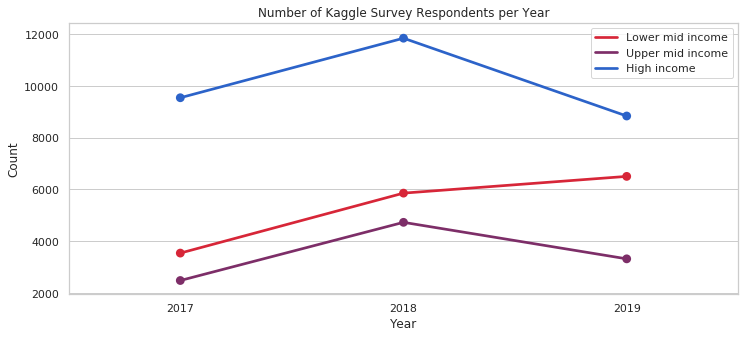

In [109]:
lineplot_survey_summary(responses)

In [110]:
responses['Income group'].value_counts(normalize=True, sort=False).mul(100)

Upper mid    17.805283
High         47.339656
Lower mid    34.855061
Name: Income group, dtype: float64

In [0]:
def barplot_income_group_country_counts(df):
    fig = plt.figure(figsize=(15, 5))
    ax = plt.subplot2grid((1, 3), (0, 0))
    l = sns.countplot(df[df['Income group'] == 'Lower mid']['Q3'].sort_values(), color=LOW_MID_COLOUR, alpha=ALPHA)
    plt.title(f'Lower-mid income countries', fontsize=12)
    l.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('Number of Respondents')
    ax.set_xlabel('')

    ax = plt.subplot2grid((1, 3), (0, 1))
    m = sns.countplot(df[df['Income group'] == 'Upper mid']['Q3'].sort_values(), color=UP_MID_COLOUR, alpha=ALPHA)
    plt.title(f'Upper-mid income countries', fontsize=12)
    m.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('')
    ax.set_xlabel('')

    ax = plt.subplot2grid((1, 3), (0, 2))
    h = sns.countplot(df[df['Income group'] == 'High']['Q3'].sort_values(), color=HIGH_COLOUR, alpha=ALPHA)
    plt.title(f'High income countries', fontsize=12)
    h.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('')
    ax.set_xlabel('')

    plt.tight_layout()
    plt.show()

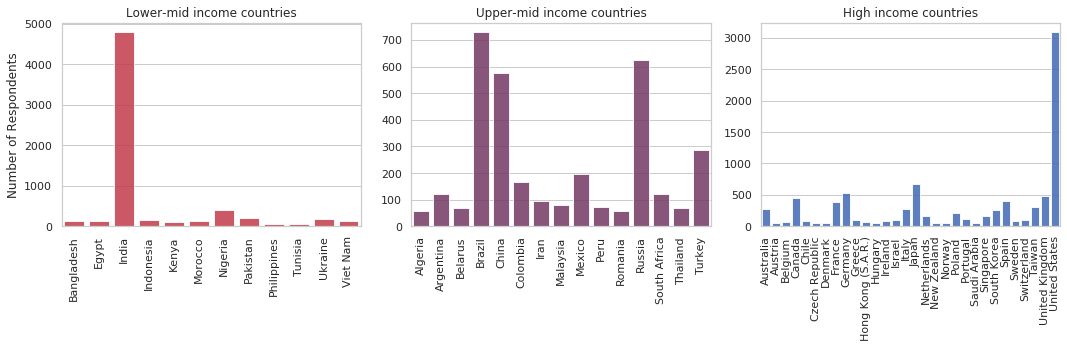

In [112]:
barplot_income_group_country_counts(responses)

In [0]:
def pieplot_income_group_percentage(df, title, column, xlabel_rotation=45):
    agg = responses.groupby(['Income group'], sort=False)
    col_counts = agg[column].value_counts(normalize=True, sort=False)
    percentage_df = pd.DataFrame(col_counts)
    percentage_df.columns = ['percentage']
    percentage_df.reset_index(inplace=True)

    labels = ['Female', 'Male', 'Other']
    LOW_MID_COLOUR = ['#810a1e', '#ef3654', '#F58699']
    UP_MID_COLOUR = ['#34002D', '#7A4C74', '#AF93AB']
    HIGH_COLOUR = ['#10254b', '#2c63c9', '#95B1E4']
    size = 0.5
    shared_pi_formats = {'wedgeprops': dict(width=size, edgecolor='w'),
                         'textprops': dict(color='white', fontsize=10),
                         'autopct': '%.1f %%'}
    fig = plt.figure(figsize=(15, 5))
    ax = plt.subplot2grid((1, 3), (0, 0))
    ax.pie(percentage_df[percentage_df['Income group'] == 'Lower mid']['percentage'], radius=1,
           colors=LOW_MID_COLOUR, pctdistance=0.75, **shared_pi_formats)
    plt.title(f'{title} - Lower-mid income', fontsize=12)
    ax.legend(loc=(0.8, 0.8), labels=labels)

    ax = plt.subplot2grid((1, 3), (0, 1))
    ax.pie(percentage_df[percentage_df['Income group'] == 'Upper mid']['percentage'], radius=1,
           colors=UP_MID_COLOUR, pctdistance=0.75, **shared_pi_formats)
    plt.title(f'{title} - Upper-mid income', fontsize=12)
    ax.legend(loc=(0.8, 0.8), labels=labels)

    ax = plt.subplot2grid((1, 3), (0, 2))
    ax.pie(percentage_df[percentage_df['Income group'] == 'High']['percentage'], radius=1,
           colors=HIGH_COLOUR, pctdistance=0.75, **shared_pi_formats)
    plt.title(f'{title} - High income', fontsize=12)
    ax.legend(loc=(0.8, 0.8), labels=labels)

    plt.show()

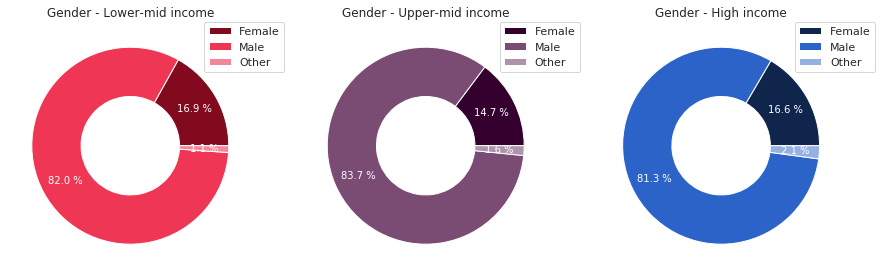

In [114]:
# Demographics

# Gender
pieplot_income_group_percentage(responses, 'Gender', 'Q2')

In [0]:
def violinplot_income_group(df, title, column):
    ymax = df[column].map(encoding_dict[column]).max()+1

    plt.figure(figsize=(6, 4))
    ax = sns.violinplot(x=df['Income group'], 
                   y=df[column].map(encoding_dict[column]),
                   #bw=1,
                   order=INCOME_GROUP_ORDER,
                   palette=[LOW_MID_COLOUR, UP_MID_COLOUR, HIGH_COLOUR])
    plt.setp(ax.collections, alpha=ALPHA)
    plt.yticks(np.arange(0, ymax, 1.0))
    ax.set_yticklabels([*encoding_dict[column].keys()])
    ax.set_title(title)
    ax.set_ylabel(column)
    plt.show()

In [116]:
responses['Q1'].map(encoding_dict['Q1']).max()+1

11

In [117]:
responses['Q1'].map(encoding_dict['Q1'])

0        1
1        7
2        4
3        2
4        4
        ..
18658    3
18659    2
18660    3
18661    2
18662    4
Name: Q1, Length: 18663, dtype: int64

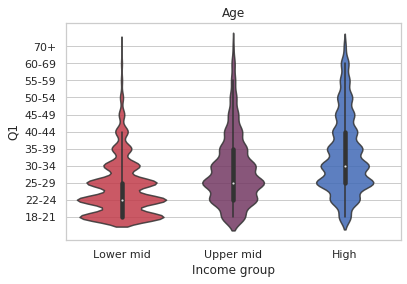

In [118]:
# Age, Education, Coding Experience, ML Experience and Salary

violinplot_income_group(responses, 'Age', 'Q1')

In [0]:
def violinplot_subplot_income_group(df, title, column):
    num_plots = len(column)
    num_cols = 2
    num_rows = int(math.ceil(num_plots/2.0)) 

    f = plt.figure(figsize=(15, 5*num_rows))
    for i in range(num_plots):
        ymax = df[column[i]].map(encoding_dict[column[i]]).max()+1
        f.add_subplot(num_rows, num_cols, i+1)  
        ax = sns.violinplot(x=df['Income group'], 
                            y=df[column[i]].map(encoding_dict[column[i]]),
                            order=INCOME_GROUP_ORDER,
                            palette=[LOW_MID_COLOUR, UP_MID_COLOUR, HIGH_COLOUR])
        plt.setp(ax.collections, alpha=ALPHA)
        plt.yticks(np.arange(0, ymax, 1.0))
        ax.set_yticklabels([*encoding_dict[column[i]].keys()])
        ax.set_title(title[i])
    plt.tight_layout();
    plt.show()

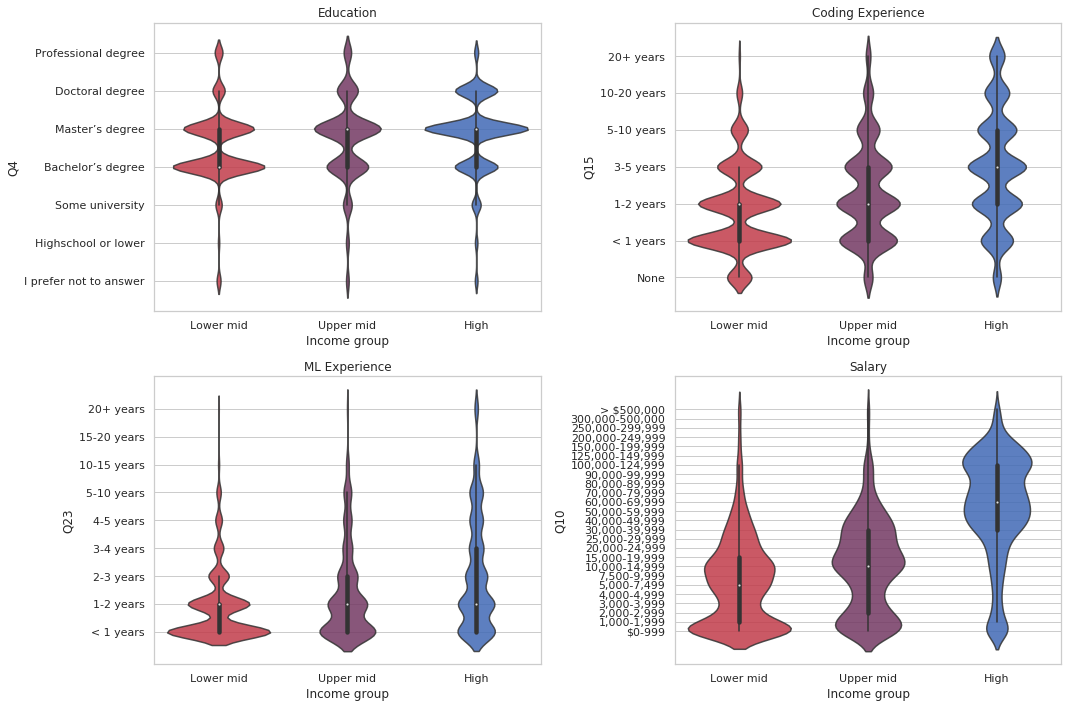

In [120]:
violinplot_subplot_income_group(responses, 
                                ['Education', 'Coding Experience', 'ML Experience', 'Salary'],
                                ['Q4', 'Q15', 'Q23', 'Q10'])

In [0]:
def plot_nominal_income_group_counts(df, title, column, xlabel_rotation=45): 
    order = [*encoding_dict[column].keys()]
    order1 = [encoding_dict[column].keys()]
    print(order)
    print(order1)
    xlabels = [*encoding_dict[column].values()]
    
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot2grid((1,3),(0,0))
    l = sns.countplot(df[df['Income group']=='Lower mid'][column], 
                      order=order, 
                      color=LOW_MID_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - Lower-mid income', fontsize=12)
    l.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')
    
    ax = plt.subplot2grid((1,3),(0,1)) 
    m = sns.countplot(df[df['Income group']=='Upper mid'][column], 
                      order=order, 
                      color=UP_MID_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - Upper-mid income', fontsize=12)
    m.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')
    
    ax = plt.subplot2grid((1,3),(0,2))
    h = sns.countplot(df[df['Income group']=='High'][column], 
                      order=order, 
                      color=HIGH_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - High income', fontsize=12)
    h.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')
    
    plt.tight_layout()
    plt.show()

['Not employed', 'Student', 'Product/Project Manager', 'Business Analyst', 'Data Analyst', 'Data Engineer', 'DBA/Database Engineer', 'Software Engineer', 'Statistician', 'Data Scientist', 'Research Scientist', 'Other']
[dict_keys(['Not employed', 'Student', 'Product/Project Manager', 'Business Analyst', 'Data Analyst', 'Data Engineer', 'DBA/Database Engineer', 'Software Engineer', 'Statistician', 'Data Scientist', 'Research Scientist', 'Other'])]


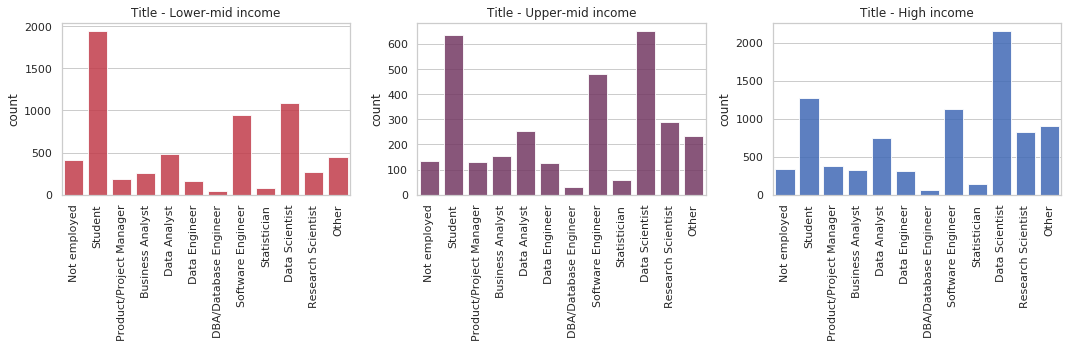

In [122]:
# Work

# Title and Work Activities
plot_nominal_income_group_counts(responses, 'Title', 'Q5', xlabel_rotation=90)

In [0]:
def plot_nominal_split_income_group_counts(df, title, column, xlabel_rotation=45):  
    cols = [col for col in df.columns if column+'_Part_' in col]
    print(cols)
    order = [*encoding_dict[column].keys()]
    print(order)
    xlabels = [*encoding_dict[column].values()]
    print(xlabels)
    
    fig = plt.figure(figsize=(15,5))
        
    temp = pd.melt(df[df['Income group']=='Lower mid'][cols])
    print(temp)
    ax = plt.subplot2grid((1,3),(0,0))
    l = sns.countplot(data=temp.loc[~temp['value'].isnull()], x='variable', 
                      order=order, 
                      color=LOW_MID_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - Lower-mid income', fontsize=12)
    l.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')
    
    temp = pd.melt(df[df['Income group']=='Upper mid'][cols])
    ax = plt.subplot2grid((1,3),(0,1))
    m = sns.countplot(data=temp.loc[~temp['value'].isnull()], x='variable', 
                      order=order, 
                      color=UP_MID_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - Upper-mid income', fontsize=12)
    m.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')

    temp = pd.melt(df[df['Income group']=='High'][cols])
    ax = plt.subplot2grid((1,3),(0,2))
    h = sns.countplot(data=temp.loc[~temp['value'].isnull()], x='variable', 
                      order=order, 
                      color=HIGH_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - High income', fontsize=12)
    h.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')

    plt.tight_layout()
    plt.show()

['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8']
['Q9_Part_7', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_8']
['None', 'Data analysis', 'Data Infrastructure', 'Build ML Prototypes', 'Build/Run ML Services', 'Experimentation ML Models', 'ML Research', 'Other']
        variable                                              value
0      Q9_Part_1  Analyze and understand data to influence produ...
1      Q9_Part_1                                                NaN
2      Q9_Part_1  Analyze and understand data to influence produ...
3      Q9_Part_1                                                NaN
4      Q9_Part_1                                                NaN
...          ...                                                ...
52035  Q9_Part_8                                                NaN
52036  Q9_Part_8                                                NaN
52037  Q9_Part_8            

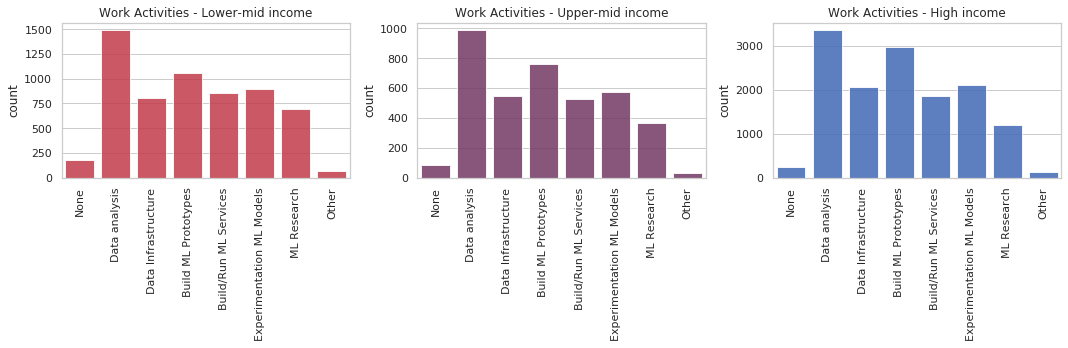

In [130]:
plot_nominal_split_income_group_counts(responses, 'Work Activities', 'Q9', xlabel_rotation=90)

In [0]:
def spider_subplot_income_group_counts_by_question_part(df, q1, q2, question_parts):
    num_plots = len(question_parts)
    num_cols = 3
    num_rows = int(math.ceil(num_plots/3.0)) 

    fig = plt.figure(figsize=(15, 5*num_rows))    
    titles = [encoding_dict[q1][key] for key in question_parts]
    for i in range(num_plots):
        fig.add_subplot(num_rows, num_cols, i+1)  

        cols = [*encoding_dict[q2].keys()]
        print(cols)
        labels = [*encoding_dict[q2].values()]

        i_df = df[df[q1] == question_parts[i]]
        
        agg = i_df[cols+['Income group']].groupby(['Income group'], sort=False).count()
        size = i_df[cols+['Income group']].groupby(['Income group'], sort=False).size()
        agg['total'] = size
        agg = pd.melt(agg.reset_index(), id_vars='Income group', value_vars=cols)

        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        angles=np.concatenate((angles,[angles[0]])) # close the plot

        low_stats = agg[agg['Income group']=='Lower mid']['value'].values
        low_stats=np.concatenate((low_stats,[low_stats[0]])) # close the plot

        mid_stats = agg[agg['Income group']=='Upper mid']['value'].values
        mid_stats=np.concatenate((mid_stats,[mid_stats[0]])) # close the plot

        high_stats = agg[agg['Income group']=='High']['value'].values
        high_stats=np.concatenate((high_stats,[high_stats[0]])) # close the plot

        ax = fig.add_subplot(num_rows, num_cols, i+1, polar=True)
        
        ax.plot(angles, low_stats, 'o-', color=LOW_MID_COLOUR, linewidth=2)
        ax.fill(angles, low_stats, color=LOW_MID_COLOUR, alpha=0.2)

        ax.plot(angles, mid_stats, 'o-', color=UP_MID_COLOUR, linewidth=2)
        ax.fill(angles, mid_stats, color=UP_MID_COLOUR, alpha=0.2)

        ax.plot(angles, high_stats, 'o-', color=HIGH_COLOUR, linewidth=2)
        ax.fill(angles, high_stats, color=HIGH_COLOUR, alpha=0.2)

        ax.set_thetagrids(angles * 180/np.pi, labels)
        ax.set_title(titles[i], fontsize=12, pad=15)
        ax.grid(True)
        
    plt.tight_layout()
    plt.show()

In [152]:
t = responses[responses['Q5'] == 'Software Engineer']
a1 = t[['Q9_Part_7', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_8']+['Income group']].groupby(['Income group']).count()
a1

,Q9_Part_7,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_8
Income group,,,,,,,,
High,105,296,285,329,219,209,111,18
Lower mid,122,214,163,207,154,136,116,20
Upper mid,42,119,80,91,77,66,45,6


In [153]:
s1 = t[['Q9_Part_7', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_8']+['Income group']].groupby(['Income group']).size()
s1

Income group
High         1124
Lower mid     949
Upper mid     480
dtype: int64

In [154]:
a1['total'] = s1
a1

,Q9_Part_7,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_8,total
Income group,,,,,,,,,
High,105,296,285,329,219,209,111,18,1124
Lower mid,122,214,163,207,154,136,116,20,949
Upper mid,42,119,80,91,77,66,45,6,480


In [155]:
a1 = pd.melt(a1.reset_index(), id_vars='Income group', value_vars=['Q9_Part_7', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_8'])
a1

,Income group,variable,value
0,High,Q9_Part_7,105
1,Lower mid,Q9_Part_7,122
2,Upper mid,Q9_Part_7,42
3,High,Q9_Part_1,296
4,Lower mid,Q9_Part_1,214
5,Upper mid,Q9_Part_1,119
6,High,Q9_Part_2,285
7,Lower mid,Q9_Part_2,163
8,Upper mid,Q9_Part_2,80
9,High,Q9_Part_3,329


['Q9_Part_7', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_8']
['Q9_Part_7', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_8']
['Q9_Part_7', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_8']


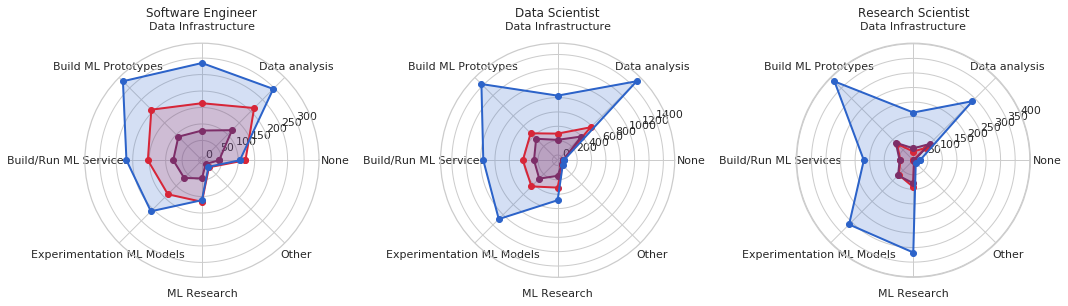

In [132]:
spider_subplot_income_group_counts_by_question_part(responses, 'Q5', 'Q9', 
                                                    ['Software Engineer', 'Data Scientist', 'Research Scientist'])

In [0]:
def violinplot_subplot_income_group(df, title, column):
    num_plots = len(column)
    num_cols = 2
    num_rows = int(math.ceil(num_plots/2.0)) 

    f = plt.figure(figsize=(15, 5*num_rows))
    for i in range(num_plots):
        ymax = df[column[i]].map(encoding_dict[column[i]]).max()+1
        f.add_subplot(num_rows, num_cols, i+1)  
        ax = sns.violinplot(x=df['Income group'], 
                            y=df[column[i]].map(encoding_dict[column[i]]),
                            order=INCOME_GROUP_ORDER,
                            palette=[LOW_MID_COLOUR, UP_MID_COLOUR, HIGH_COLOUR])
        plt.setp(ax.collections, alpha=ALPHA)
        plt.yticks(np.arange(0, ymax, 1.0))
        ax.set_yticklabels([*encoding_dict[column[i]].keys()])
        ax.set_title(title[i])
    plt.tight_layout();
    plt.show()

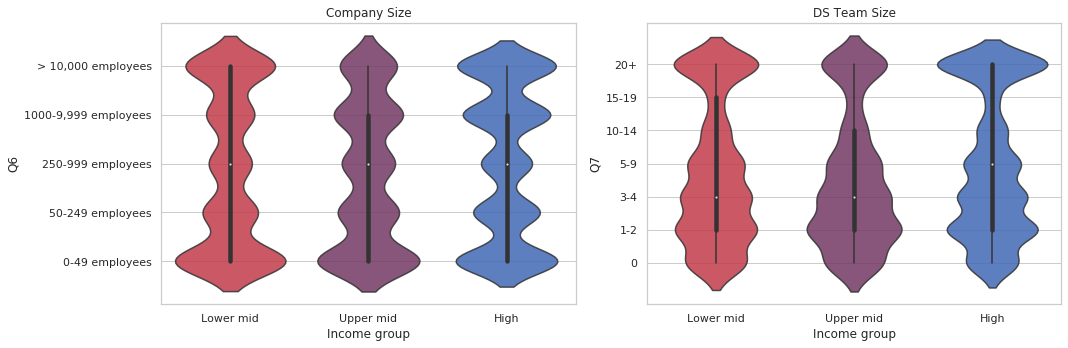

In [156]:
# Company Size, Data Science Team Size, Use of ML Methods and Spending on AI
violinplot_subplot_income_group(responses, ['Company Size', 'DS Team Size'], ['Q6', 'Q7'])

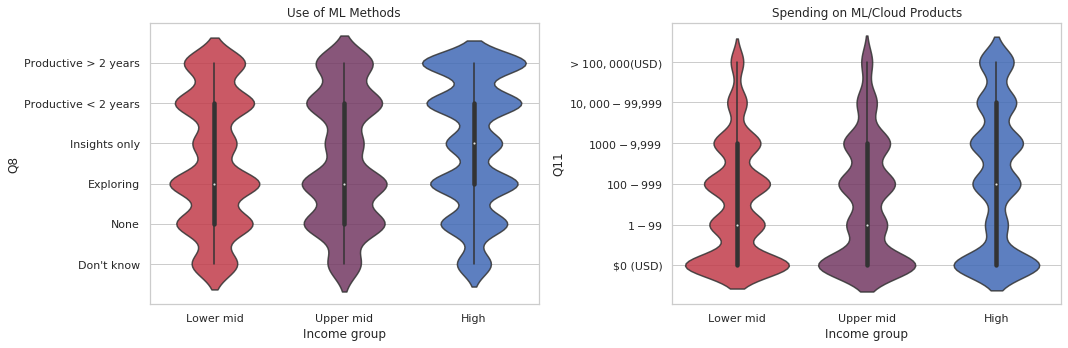

In [157]:
violinplot_subplot_income_group(responses, ['Use of ML Methods', 'Spending on ML/Cloud Products'], ['Q8', 'Q11'])

In [0]:
def plot_nominal_income_group_counts(df, title, column, xlabel_rotation=45): 
    order = [*encoding_dict[column].keys()]
    order1 = [encoding_dict[column].keys()]
    print(order)
    print(order1)
    xlabels = [*encoding_dict[column].values()]
    
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot2grid((1,3),(0,0))
    l = sns.countplot(df[df['Income group']=='Lower mid'][column], 
                      order=order, 
                      color=LOW_MID_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - Lower-mid income', fontsize=12)
    l.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')
    
    ax = plt.subplot2grid((1,3),(0,1)) 
    m = sns.countplot(df[df['Income group']=='Upper mid'][column], 
                      order=order, 
                      color=UP_MID_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - Upper-mid income', fontsize=12)
    m.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')
    
    ax = plt.subplot2grid((1,3),(0,2))
    h = sns.countplot(df[df['Income group']=='High'][column], 
                      order=order, 
                      color=HIGH_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - High income', fontsize=12)
    h.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')
    
    plt.tight_layout()
    plt.show()

['None', 'Basic statistical software (Microsoft Excel, Google Sheets, etc.)', 'Advanced statistical software (SPSS, SAS, etc.)', 'Local development environments (RStudio, JupyterLab, etc.)', 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)', 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)']
[dict_keys(['None', 'Basic statistical software (Microsoft Excel, Google Sheets, etc.)', 'Advanced statistical software (SPSS, SAS, etc.)', 'Local development environments (RStudio, JupyterLab, etc.)', 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)', 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)'])]


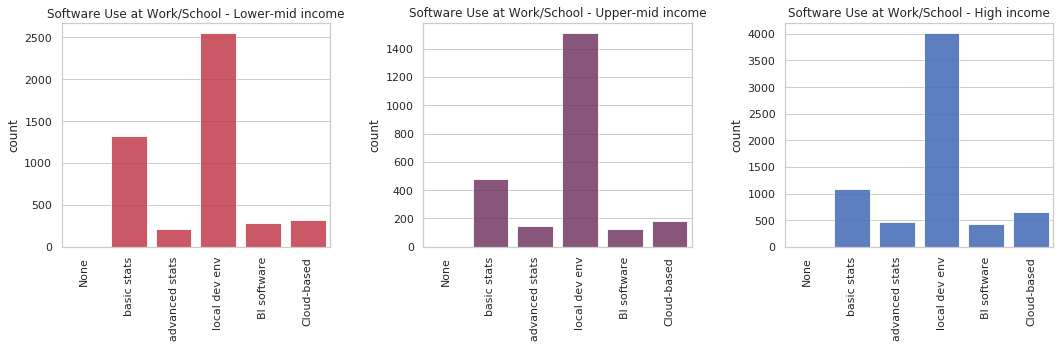

In [158]:
# Languages, Methods and Tools

# Primary Tool used at Work / School to Analyze Data

plot_nominal_income_group_counts(responses, 'Software Use at Work/School', 'Q14', xlabel_rotation=90)

In [0]:
def spider_subplot_income_group_counts(df, title, column):
    num_plots = len(column)
    num_cols = 3
    num_rows = int(math.ceil(num_plots/3.0))

    fig = plt.figure(figsize=(15, 5*num_rows))
    for i in range(num_plots):
        fig.add_subplot(num_rows, num_cols, i+1)  
        
        cols = [col for col in df.columns if column[i]+'_Part_' in col]
        cols.remove(column[i]+'_Part_11') # Remove "None" responses (Part_11)
        labels = [*encoding_dict[column[i]].values()]
        labels.remove('None') # Remove "None responses"

        agg = df[cols+['Income group']].groupby(['Income group'], sort=False).count()
        size = df[cols+['Income group']].groupby(['Income group'], sort=False).size()
        agg['total'] = size
        agg = pd.melt(agg.reset_index(), id_vars='Income group', value_vars=cols)
        agg = agg[agg['variable'] != column[i]+'_Part_11'] # Remove none (Part_11)

        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        angles=np.concatenate((angles,[angles[0]])) # close the plot

        low_stats = agg[agg['Income group']=='Lower mid']['value'].values
        low_stats=np.concatenate((low_stats,[low_stats[0]])) # close the plot

        mid_stats = agg[agg['Income group']=='Upper mid']['value'].values
        mid_stats=np.concatenate((mid_stats,[mid_stats[0]])) # close the plot

        high_stats = agg[agg['Income group']=='High']['value'].values
        high_stats=np.concatenate((high_stats,[high_stats[0]])) # close the plot

        ax = fig.add_subplot(num_rows, num_cols, i+1, polar=True)
        ax.plot(angles, low_stats, 'o-', color=LOW_MID_COLOUR, linewidth=2)
        ax.fill(angles, low_stats, color=LOW_MID_COLOUR, alpha=0.2)

        ax.plot(angles, mid_stats, 'o-', color=UP_MID_COLOUR, linewidth=2)
        ax.fill(angles, mid_stats, color=UP_MID_COLOUR, alpha=0.2)

        ax.plot(angles, high_stats, 'o-', color=HIGH_COLOUR, linewidth=2)
        ax.fill(angles, high_stats, color=HIGH_COLOUR, alpha=0.2)

        ax.set_thetagrids(angles * 180/np.pi, labels)
        ax.set_title(title[i], fontsize=12, pad=15)
        ax.grid(True)
        
    plt.tight_layout()
    plt.show()

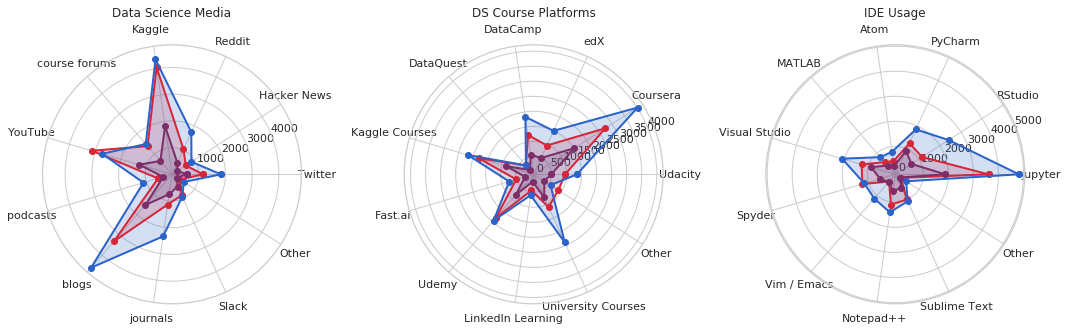

In [159]:
# Favourite Data Science Media Sources, Course Platforms and IDEs¶
spider_subplot_income_group_counts(responses,
                                   ['Data Science Media', 'DS Course Platforms', 'IDE Usage'],
                                   ['Q12', 'Q13', 'Q16'])

In [0]:
def plot_nominal_split_income_group_counts(df, title, column, xlabel_rotation=45):  
    cols = [col for col in df.columns if column+'_Part_' in col]
    print(cols)
    order = [*encoding_dict[column].keys()]
    print(order)
    xlabels = [*encoding_dict[column].values()]
    print(xlabels)
    
    fig = plt.figure(figsize=(15,5))
        
    temp = pd.melt(df[df['Income group']=='Lower mid'][cols])
    print(temp)
    ax = plt.subplot2grid((1,3),(0,0))
    l = sns.countplot(data=temp.loc[~temp['value'].isnull()], x='variable', 
                      order=order, 
                      color=LOW_MID_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - Lower-mid income', fontsize=12)
    l.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')
    
    temp = pd.melt(df[df['Income group']=='Upper mid'][cols])
    ax = plt.subplot2grid((1,3),(0,1))
    m = sns.countplot(data=temp.loc[~temp['value'].isnull()], x='variable', 
                      order=order, 
                      color=UP_MID_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - Upper-mid income', fontsize=12)
    m.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')

    temp = pd.melt(df[df['Income group']=='High'][cols])
    ax = plt.subplot2grid((1,3),(0,2))
    h = sns.countplot(data=temp.loc[~temp['value'].isnull()], x='variable', 
                      order=order, 
                      color=HIGH_COLOUR,
                      alpha=ALPHA)
    plt.title(f'{title} - High income', fontsize=12)
    h.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')

    plt.tight_layout()
    plt.show()

['Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 'Q17_Part_11', 'Q17_Part_12']
['Q17_Part_11', 'Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 'Q17_Part_12']
['None', 'Kaggle Notebooks', 'Google Colab', 'Microsoft Azure', 'Google Cloud', 'Paperspace / Graient', 'FloydHub', 'Binder / JupyterHub', 'IBM Watson', 'code Ocean', 'AWS Products', 'Other']
          variable                         value
0       Q17_Part_1                           NaN
1       Q17_Part_1                           NaN
2       Q17_Part_1   Kaggle Notebooks (Kernels) 
3       Q17_Part_1                           NaN
4       Q17_Part_1                           NaN
...            ...                           ...
78055  Q17_Part_12                           NaN
78056  Q17_Part_12                           NaN
78057  Q17_Part_12     

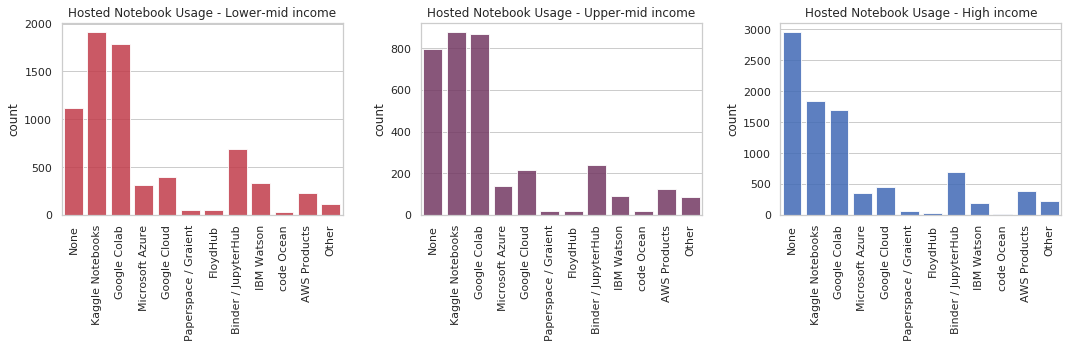

In [160]:
# Usage of Hosted Notebooks
plot_nominal_split_income_group_counts(responses, 'Hosted Notebook Usage', 'Q17', xlabel_rotation=90)

['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10', 'Q18_Part_11', 'Q18_Part_12']
['Q18_Part_11', 'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10', 'Q18_Part_12']
['None', 'Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'TypeScript', 'Bash', 'MATLAB', 'Other']
          variable   value
0       Q18_Part_1     NaN
1       Q18_Part_1  Python
2       Q18_Part_1  Python
3       Q18_Part_1  Python
4       Q18_Part_1     NaN
...            ...     ...
78055  Q18_Part_12     NaN
78056  Q18_Part_12     NaN
78057  Q18_Part_12     NaN
78058  Q18_Part_12     NaN
78059  Q18_Part_12     NaN

[78060 rows x 2 columns]


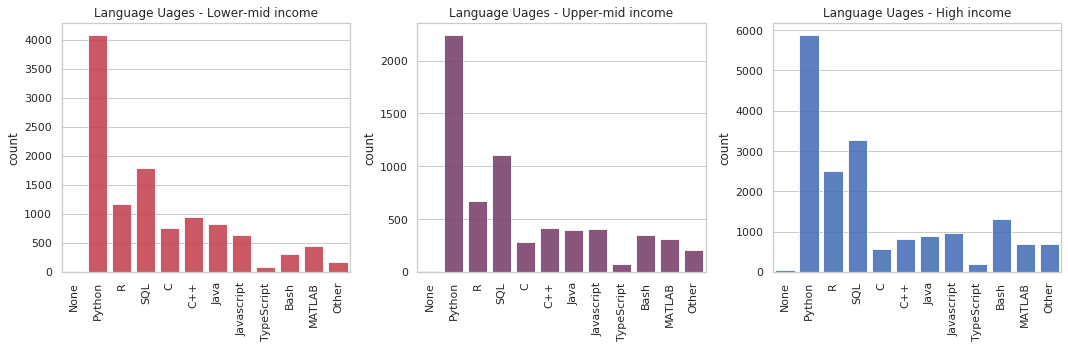

In [161]:
# Languages Usage
plot_nominal_split_income_group_counts(responses, 'Language Uages', 'Q18', xlabel_rotation=90)

['Q20_Part_1', 'Q20_Part_2', 'Q20_Part_3', 'Q20_Part_4', 'Q20_Part_5', 'Q20_Part_6', 'Q20_Part_7', 'Q20_Part_8', 'Q20_Part_9', 'Q20_Part_10', 'Q20_Part_11', 'Q20_Part_12']
['Q20_Part_11', 'Q20_Part_1', 'Q20_Part_2', 'Q20_Part_3', 'Q20_Part_4', 'Q20_Part_5', 'Q20_Part_6', 'Q20_Part_7', 'Q20_Part_8', 'Q20_Part_9', 'Q20_Part_10', 'Q20_Part_12']
['None', 'Ggplot', 'Matplotlib', 'Altair', 'Shiny', 'D3.js', 'Plotly', 'Bokeh', 'Seaborn', 'Geoplotlib', 'Leaflet / Folium', 'Other']
          variable value
0       Q20_Part_1   NaN
1       Q20_Part_1   NaN
2       Q20_Part_1   NaN
3       Q20_Part_1   NaN
4       Q20_Part_1   NaN
...            ...   ...
78055  Q20_Part_12   NaN
78056  Q20_Part_12   NaN
78057  Q20_Part_12   NaN
78058  Q20_Part_12   NaN
78059  Q20_Part_12   NaN

[78060 rows x 2 columns]


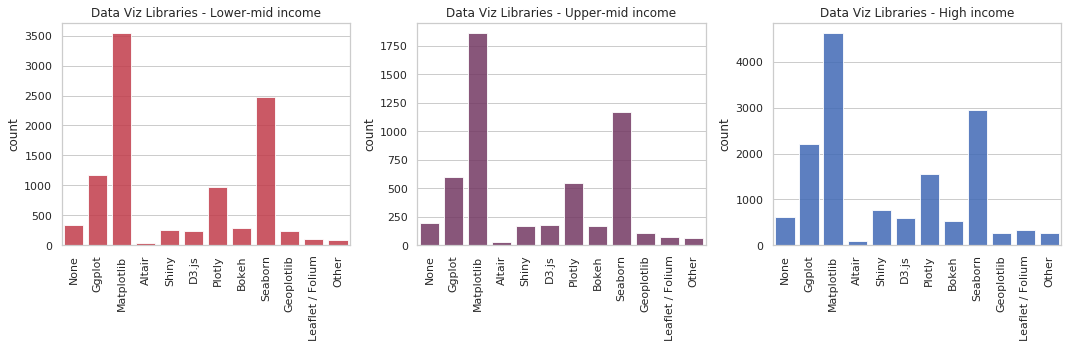

In [162]:
# Usage of Data Viz Tools
plot_nominal_split_income_group_counts(responses, 'Data Viz Libraries', 'Q20', xlabel_rotation=90)

In [0]:
def plot_split_income_group_ratios(df, title, column, xlabel_rotation=45):
    plt.figure(figsize=(6, 4))
    cols = [col for col in df.columns if column+'_Part_' in col]
    print(cols)
    order = [*encoding_dict[column].keys()]
    xlabels = [*encoding_dict[column].values()]

    agg = responses[cols+['Income group']].groupby(['Income group'], sort=False).count()
    size = responses[cols+['Income group']].groupby(['Income group'], sort=False).size()
    agg['total'] = size
    for col in cols:
        agg[col] = agg[col]/agg['total']
        
    agg = pd.melt(agg.reset_index(), id_vars='Income group', value_vars=cols)
    ax = sns.barplot(data=agg,
                 x='variable',
                 y='value',
                 hue='Income group',
                 order=order,
                 hue_order=INCOME_GROUP_ORDER,
                 palette=[LOW_MID_COLOUR, UP_MID_COLOUR, HIGH_COLOUR],
                 alpha=ALPHA)
    plt.title(title, fontsize=12)
    ax.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')
    ax.set_ylabel('ratio of count to total responses')
    
    plt.show()

['Q21_Part_1', 'Q21_Part_2', 'Q21_Part_3', 'Q21_Part_4', 'Q21_Part_5']


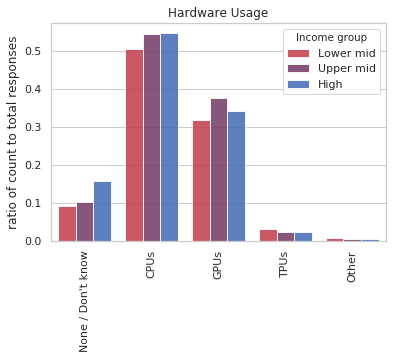

In [164]:
# Specialised Hardware Usage
plot_split_income_group_ratios(responses, 'Hardware Usage', 'Q21', xlabel_rotation=90)

In [0]:
def violinplot_income_group(df, title, column):
    ymax = df[column].map(encoding_dict[column]).max()+1

    plt.figure(figsize=(6, 4))
    ax = sns.violinplot(x=df['Income group'], 
                   y=df[column].map(encoding_dict[column]),
                   #bw=1,
                   order=INCOME_GROUP_ORDER,
                   palette=[LOW_MID_COLOUR, UP_MID_COLOUR, HIGH_COLOUR])
    plt.setp(ax.collections, alpha=ALPHA)
    plt.yticks(np.arange(0, ymax, 1.0))
    ax.set_yticklabels([*encoding_dict[column].keys()])
    ax.set_title(title)
    ax.set_ylabel(column)
    plt.show()

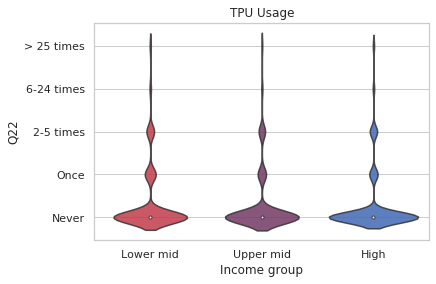

In [165]:
violinplot_income_group(responses, 'TPU Usage', 'Q22')

In [166]:
pd.crosstab(responses['Income group'],responses['Q22']).apply(lambda r: r/r.sum(), axis=1)

Q22,2-5 times,6-24 times,> 25 times,Never,Once
Income group,,,,,
High,0.068495,0.013489,0.011841,0.828687,0.077488
Lower mid,0.081013,0.015062,0.011639,0.776586,0.115701
Upper mid,0.071753,0.012371,0.009072,0.814433,0.092371


In [0]:
def plot_subplot_split_income_group_ratios(df, title, column, xlabel_rotation=45):
    num_plots = len(column)
    num_cols = 3
    num_rows = int(math.ceil(num_plots/num_cols))

    f = plt.figure(figsize=(15, 5*num_rows))
    for i in range(num_plots):
        f.add_subplot(num_rows, num_cols, i+1)  
        
        cols = [col for col in df.columns if column[i]+'_Part_' in col]
        order = [*encoding_dict[column[i]].keys()]
        xlabels = [*encoding_dict[column[i]].values()]

        agg = responses[cols+['Income group']].groupby(['Income group'], sort=False).count()
        size = responses[cols+['Income group']].groupby(['Income group'], sort=False).size()
        agg['total'] = size
        for col in cols:
            agg[col] = agg[col]/agg['total']

        agg = pd.melt(agg.reset_index(), id_vars='Income group', value_vars=cols)
        ax = sns.barplot(data=agg,
                     x='variable',
                     y='value',
                     hue='Income group',
                     order=order,
                     hue_order=INCOME_GROUP_ORDER,
                     palette=[LOW_MID_COLOUR, UP_MID_COLOUR, HIGH_COLOUR],
                     alpha=ALPHA)
        plt.title(title[i], fontsize=12)
        ax.set_xticklabels(xlabels, rotation=xlabel_rotation)
        ax.set_xlabel('')
        if i%num_cols==0:
            ax.set_ylabel('ratio of x to total responses')
        else: 
            ax.set_ylabel('')
    plt.tight_layout();
    plt.show()

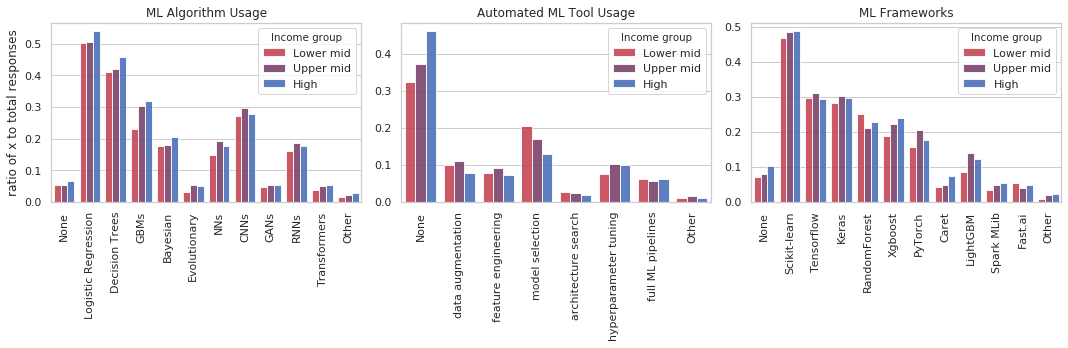

In [168]:
# Usage of ML Algorithms, Tools And Frameworks
plot_subplot_split_income_group_ratios(responses, 
                                           ['ML Algorithm Usage', 'Automated ML Tool Usage', 'ML Frameworks'],
                                           ['Q24', 'Q25', 'Q28'],
                                          xlabel_rotation=90)

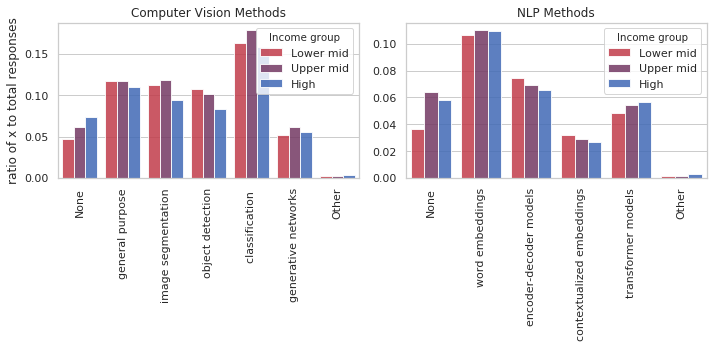

In [169]:
# Usage of Computer Vision and NLP Methods
plot_subplot_split_income_group_ratios(responses, 
                                           ['Computer Vision Methods', 'NLP Methods'],
                                           ['Q26', 'Q27'],
                                          xlabel_rotation=90)

In [0]:
def plot_split_income_group_ratios(df, title, column, xlabel_rotation=45):
    plt.figure(figsize=(6, 4))
    cols = [col for col in df.columns if column+'_Part_' in col]
    print(cols)
    order = [*encoding_dict[column].keys()]
    xlabels = [*encoding_dict[column].values()]

    agg = responses[cols+['Income group']].groupby(['Income group'], sort=False).count()
    size = responses[cols+['Income group']].groupby(['Income group'], sort=False).size()
    agg['total'] = size
    for col in cols:
        agg[col] = agg[col]/agg['total']
        
    agg = pd.melt(agg.reset_index(), id_vars='Income group', value_vars=cols)
    ax = sns.barplot(data=agg,
                 x='variable',
                 y='value',
                 hue='Income group',
                 order=order,
                 hue_order=INCOME_GROUP_ORDER,
                 palette=[LOW_MID_COLOUR, UP_MID_COLOUR, HIGH_COLOUR],
                 alpha=ALPHA)
    plt.title(title, fontsize=12)
    ax.set_xticklabels(xlabels, rotation=xlabel_rotation)
    ax.set_xlabel('')
    ax.set_ylabel('ratio of count to total responses')
    
    plt.show()

['Q29_Part_1', 'Q29_Part_2', 'Q29_Part_3', 'Q29_Part_4', 'Q29_Part_5', 'Q29_Part_6', 'Q29_Part_7', 'Q29_Part_8', 'Q29_Part_9', 'Q29_Part_10', 'Q29_Part_11', 'Q29_Part_12']


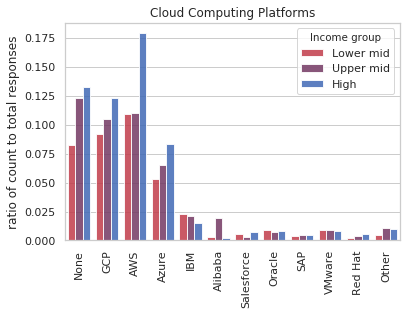

In [170]:
# Cloud Platforms and Proudcts
responses_product_usage = responses[(responses['Q15'] != 'I have never written code') & (responses['Q11']!='$0 (USD)')]
responses_product_usage.shape[0]

plot_split_income_group_ratios(responses_product_usage, 'Cloud Computing Platforms', 'Q29', xlabel_rotation=90)

In [0]:
def spider_subplot_income_group_counts(df, title, column):
    num_plots = len(column)
    num_cols = 3
    num_rows = int(math.ceil(num_plots/3.0))

    fig = plt.figure(figsize=(15, 5*num_rows))
    for i in range(num_plots):
        fig.add_subplot(num_rows, num_cols, i+1)  
        
        cols = [col for col in df.columns if column[i]+'_Part_' in col]
        cols.remove(column[i]+'_Part_11') # Remove "None" responses (Part_11)
        labels = [*encoding_dict[column[i]].values()]
        labels.remove('None') # Remove "None responses"

        agg = df[cols+['Income group']].groupby(['Income group'], sort=False).count()
        size = df[cols+['Income group']].groupby(['Income group'], sort=False).size()
        agg['total'] = size
        agg = pd.melt(agg.reset_index(), id_vars='Income group', value_vars=cols)
        agg = agg[agg['variable'] != column[i]+'_Part_11'] # Remove none (Part_11)

        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        angles=np.concatenate((angles,[angles[0]])) # close the plot

        low_stats = agg[agg['Income group']=='Lower mid']['value'].values
        low_stats=np.concatenate((low_stats,[low_stats[0]])) # close the plot

        mid_stats = agg[agg['Income group']=='Upper mid']['value'].values
        mid_stats=np.concatenate((mid_stats,[mid_stats[0]])) # close the plot

        high_stats = agg[agg['Income group']=='High']['value'].values
        high_stats=np.concatenate((high_stats,[high_stats[0]])) # close the plot

        ax = fig.add_subplot(num_rows, num_cols, i+1, polar=True)
        ax.plot(angles, low_stats, 'o-', color=LOW_MID_COLOUR, linewidth=2)
        ax.fill(angles, low_stats, color=LOW_MID_COLOUR, alpha=0.2)

        ax.plot(angles, mid_stats, 'o-', color=UP_MID_COLOUR, linewidth=2)
        ax.fill(angles, mid_stats, color=UP_MID_COLOUR, alpha=0.2)

        ax.plot(angles, high_stats, 'o-', color=HIGH_COLOUR, linewidth=2)
        ax.fill(angles, high_stats, color=HIGH_COLOUR, alpha=0.2)

        ax.set_thetagrids(angles * 180/np.pi, labels)
        ax.set_title(title[i], fontsize=12, pad=15)
        ax.grid(True)
        
    plt.tight_layout()
    plt.show()

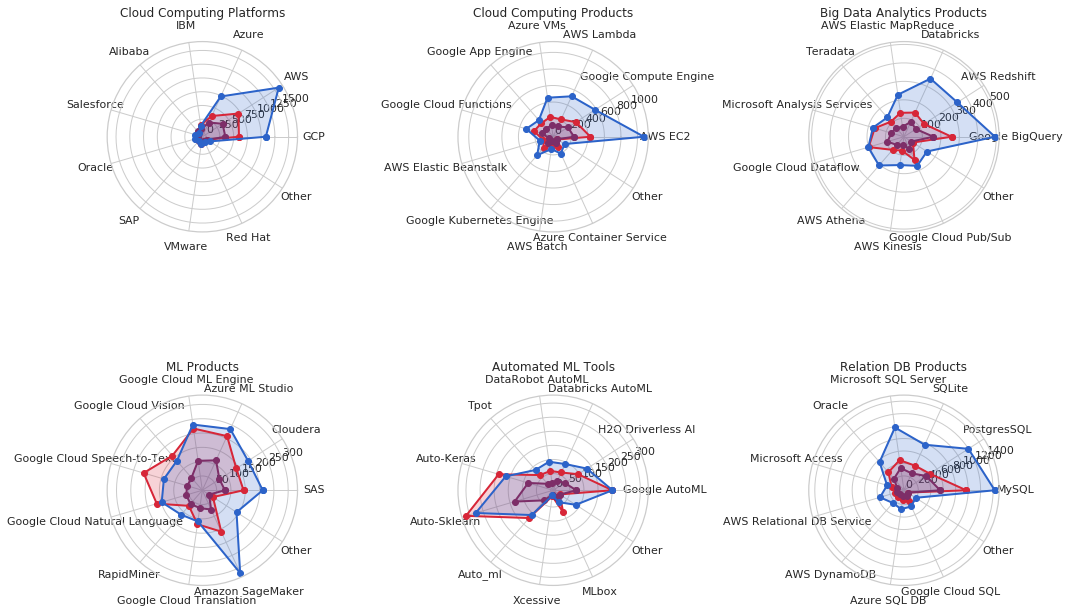

In [171]:
spider_subplot_income_group_counts(responses_product_usage,
                                   ['Cloud Computing Platforms', 'Cloud Computing Products', 'Big Data Analytics Products',
                                    'ML Products', 'Automated ML Tools', 'Relation DB Products'],
                                   ['Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34'])